In [2]:
pip install seaborn

     |████████████████████████████████| 286kB 1.5MB/s 
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np #numerical computation
import pandas as pd #data wrangling
import matplotlib.pyplot as plt #plotting package
#Next line helps with rendering plots
%matplotlib inline
import matplotlib as mpl #add'l plotting functionality
import seaborn as sns #a fancy plotting package
mpl.rcParams['figure.dpi'] = 400 #high res figures

In [8]:

df = pd.read_csv('chapter_1_cleaned_data.csv')


### Examining the Relationships between Features and the Response

In [11]:
features_response = df.columns.tolist()

In [51]:
features_response[:5]

['LIMIT_BAL', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1']

In [52]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


In [13]:
features_response[-5:]

['EDUCATION_CAT', 'graduate school', 'high school', 'others', 'university']

In [14]:
items_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                   'EDUCATION_CAT', 'graduate school', 'high school', 'none',
                   'others', 'university']

In [53]:
for x in range(5):
    print(x)

0
1
2
3
4


In [57]:
example_list_comp = [item for item in range(5)]
example_list_comp

[0, 1, 2, 3, 4]

In [16]:
features_response = [item for item in features_response if item not in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [59]:
corr = df[features_response].corr()
corr.iloc[0:5,0:5] #e6f6ecff

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_1
LIMIT_BAL,1.000000,-0.232688,-0.111873,0.149157,-0.273396
EDUCATION,-0.232688,1.000000,-0.137097,0.179035,0.112653
MARRIAGE,-0.111873,-0.137097,1.000000,-0.412828,0.019759
AGE,0.149157,0.179035,-0.412828,1.000000,-0.044277
PAY_1,-0.273396,0.112653,0.019759,-0.044277,1.000000


<AxesSubplot:>

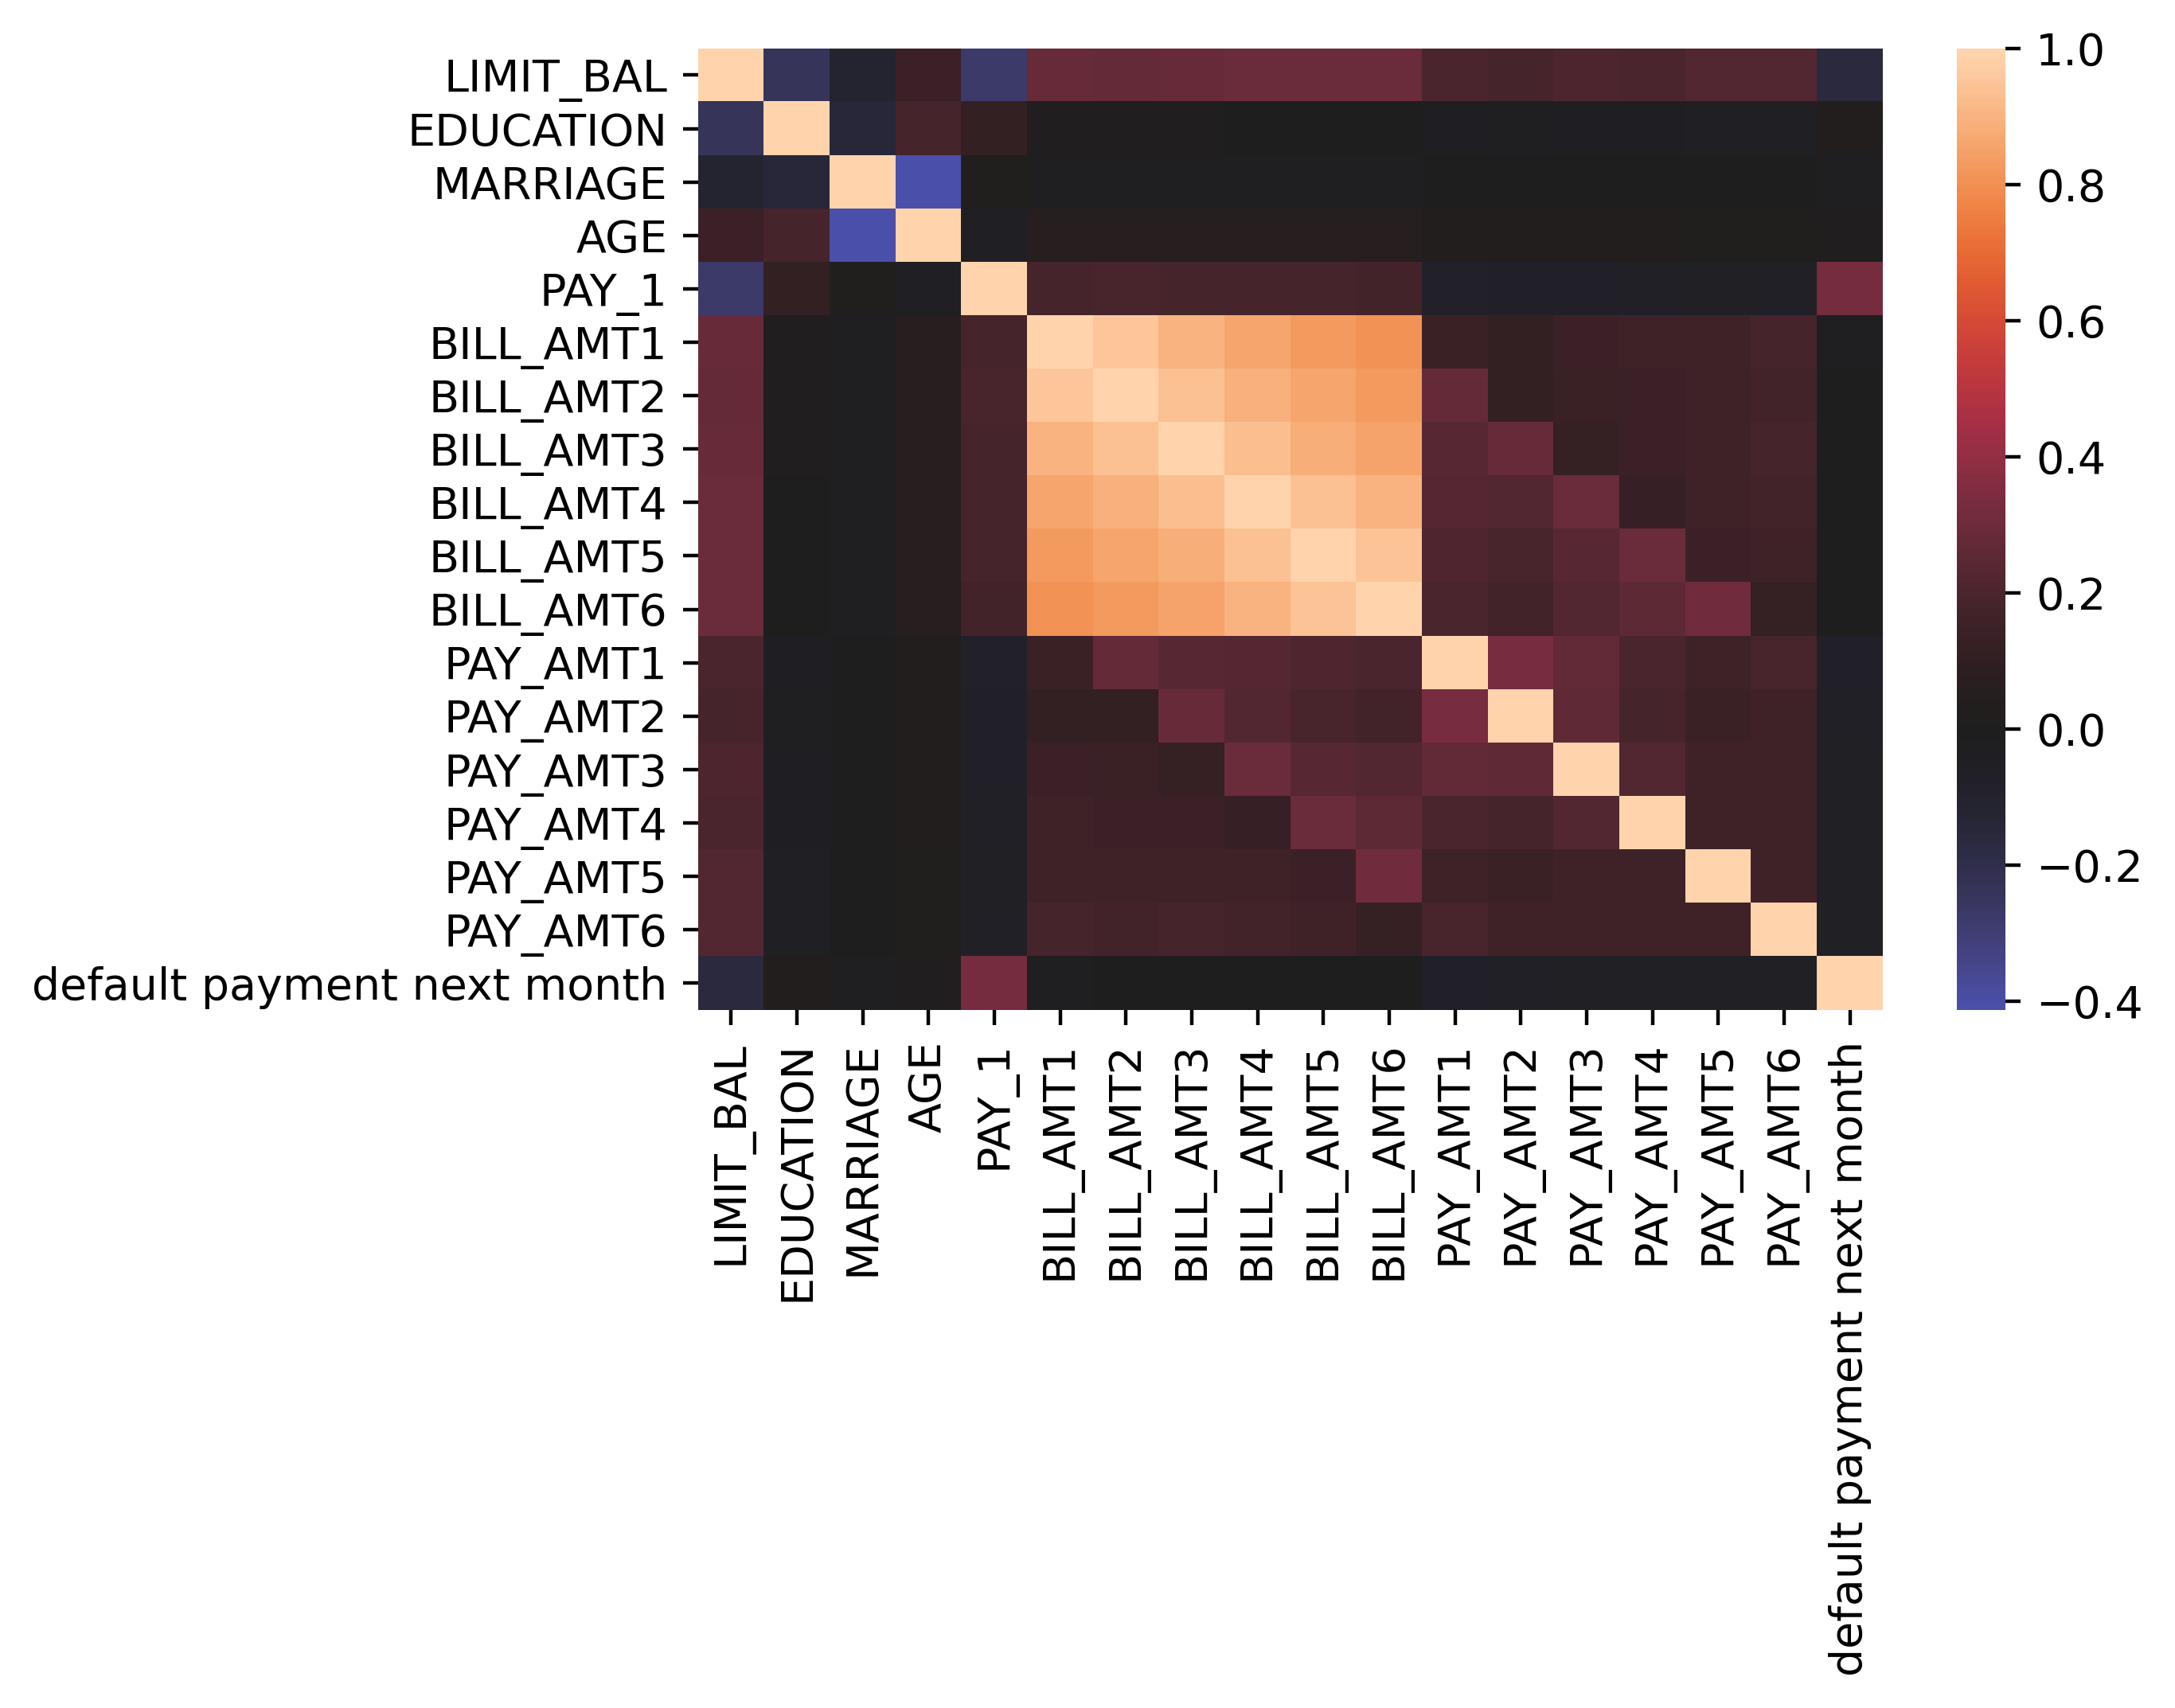

In [18]:
mpl.rcParams['figure.dpi'] = 400 #high res figures
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            center=0)

In [19]:
n_points = 500
np.random.seed(seed=2)
X = np.random.uniform(low=0.0, high=10.0, size=(n_points,))
slope = 0.25
noise = 0.2
y=[]
y.append( slope * X + np.random.normal(loc=0.0, scale=noise, size=(n_points,)) )
y.append( -slope * X + np.random.normal(loc=0.0, scale=noise, size=(n_points,)) )
y.append( np.random.normal(loc=0.0, scale=noise, size=(n_points,)) )
y.append( np.sin(X/(2)*np.pi) + np.random.normal(loc=0.0, scale=noise, size=(n_points,)) )

In [20]:
np.corrcoef(X, y[3])

array([[1.        , 0.01900706],
       [0.01900706, 1.        ]])

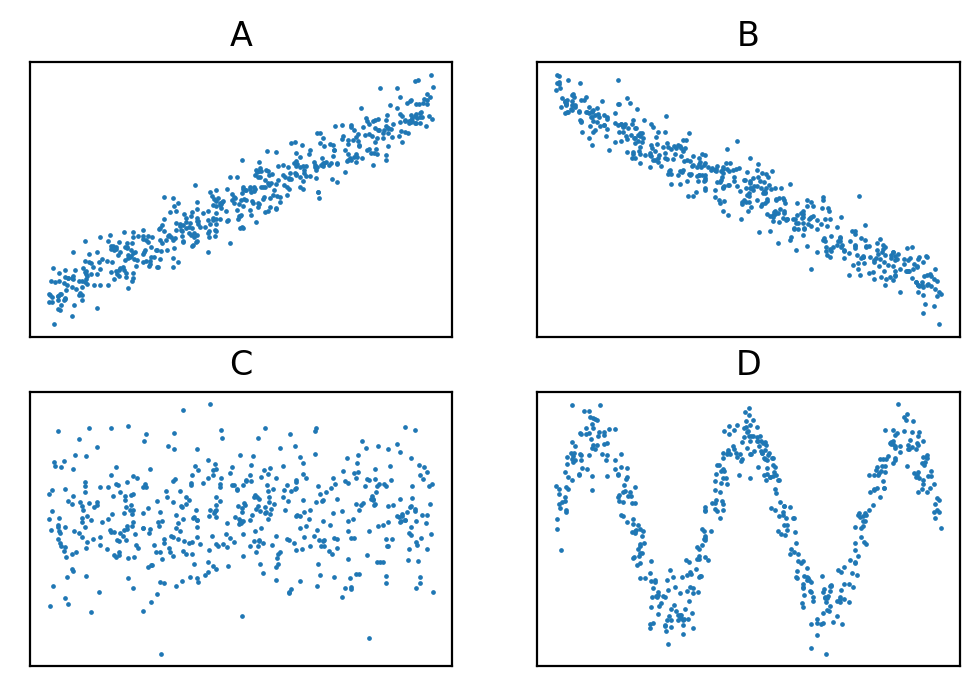

In [21]:
mpl.rcParams['figure.dpi'] = 200
fig_h, ax_h = plt.subplots(2,2)
counter = 0
correlations = []
titles = ['A', 'B', 'C', 'D']
for axis in ax_h.flatten():
    axis.scatter(X,y[counter],s=0.5)
    axis.set_xticks([])
    axis.set_yticks([])
    axis.set_title(titles[counter])
#     axis.set_title( r'$\rho = ${:0.2f}'.format(np.corrcoef(X, y[counter])[0,1]))
    correlations.append(np.corrcoef(X, y[counter])[0,1])
    counter+=1

In [22]:
correlations

[0.9637513276497898,
 -0.9659993956705687,
 0.06339625904219298,
 0.01900705554522926]

### Exercise 11: F-test and Univariate Feature Selection

In [23]:
X = df[features_response].iloc[:,:-1].values
y = df[features_response].iloc[:,-1].values
print(X.shape, y.shape)

(26664, 17) (26664,)


In [61]:
df[features_response].iloc[:,:-1]

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_1,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,1,24,2,3913,3102,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,26,-1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,34,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,1,37,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,2,1,57,-1,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26659,220000,3,1,39,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
26660,150000,3,2,43,-1,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0
26661,30000,2,2,37,4,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100
26662,80000,3,1,41,1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804


In [24]:
from sklearn.feature_selection import f_classif

In [71]:
pri, ultimos = ([1,2],[3,4])
print(pri)

[1, 2]


In [25]:
[f_stat, f_p_value] = f_classif(X, y)

In [65]:
f_classif(X, y)

(array([6.51324071e+02, 3.26377679e+01, 1.80780265e+01, 5.47913953e+00,
        3.15667230e+03, 1.12184060e+01, 5.66845420e+00, 5.72293789e+00,
        3.43474047e+00, 1.21608188e+00, 1.04956059e+00, 1.40612679e+02,
        1.01408321e+02, 9.00238734e+01, 7.96400211e+01, 8.58432945e+01,
        8.04207840e+01]),
 array([5.83836587e-142, 1.12217491e-008, 2.12755520e-005, 1.92520602e-002,
        0.00000000e+000, 8.11022595e-004, 1.72796505e-002, 1.67515708e-002,
        6.38496543e-002, 2.70140911e-001, 3.05617603e-001, 2.35835447e-032,
        8.25612412e-024, 2.54264104e-021, 4.77411188e-019, 2.09011996e-020,
        3.21956535e-019]))

In [64]:
print(f_stat.shape, f_p_value.shape)

(17,) (17,)


In [26]:
f_test_df = pd.DataFrame({'Feature':features_response[:-1],
                          'F statistic':f_stat,
                          'p value':f_p_value})
f_test_df.sort_values('p value')

,Feature,F statistic,p value
4,PAY_1,3156.672300,0.000000e+00
0,LIMIT_BAL,651.324071,5.838366e-142
11,PAY_AMT1,140.612679,2.358354e-32
12,PAY_AMT2,101.408321,8.256124e-24
13,PAY_AMT3,90.023873,2.542641e-21
15,PAY_AMT5,85.843295,2.090120e-20
16,PAY_AMT6,80.420784,3.219565e-19
14,PAY_AMT4,79.640021,4.774112e-19
1,EDUCATION,32.637768,1.122175e-08
2,MARRIAGE,18.078027,2.127555e-05


In [27]:
from sklearn.feature_selection import SelectPercentile

In [28]:
selector = SelectPercentile(f_classif, percentile=20)

In [29]:
selector.fit(X, y)

SelectPercentile(percentile=20)

In [30]:
best_feature_ix = selector.get_support()
best_feature_ix

array([ True, False, False, False,  True, False, False, False, False,
       False, False,  True,  True, False, False, False, False])

In [31]:
features = features_response[:-1]

In [32]:
best_features = [features[counter] for counter in range(len(features))
                 if best_feature_ix[counter]]

In [33]:
best_features

['LIMIT_BAL', 'PAY_1', 'PAY_AMT1', 'PAY_AMT2']

### Exercise 12: Visualizing the Relationship Between Features and Response

In [74]:
df['default payment next month']

0        1
1        1
2        0
3        0
4        0
        ..
26659    0
26660    0
26661    1
26662    1
26663    1
Name: default payment next month, Length: 26664, dtype: int64

In [34]:
overall_default_rate = df['default payment next month'].mean()
overall_default_rate

0.2217971797179718

In [35]:
group_by_pay_mean_y = df.groupby('PAY_1').agg({'default payment next month':np.mean})
group_by_pay_mean_y

,default payment next month
PAY_1,
-2,0.131664
-1,0.170002
0,0.128295
1,0.336400
2,0.694701
3,0.773973
4,0.682540
5,0.434783
6,0.545455


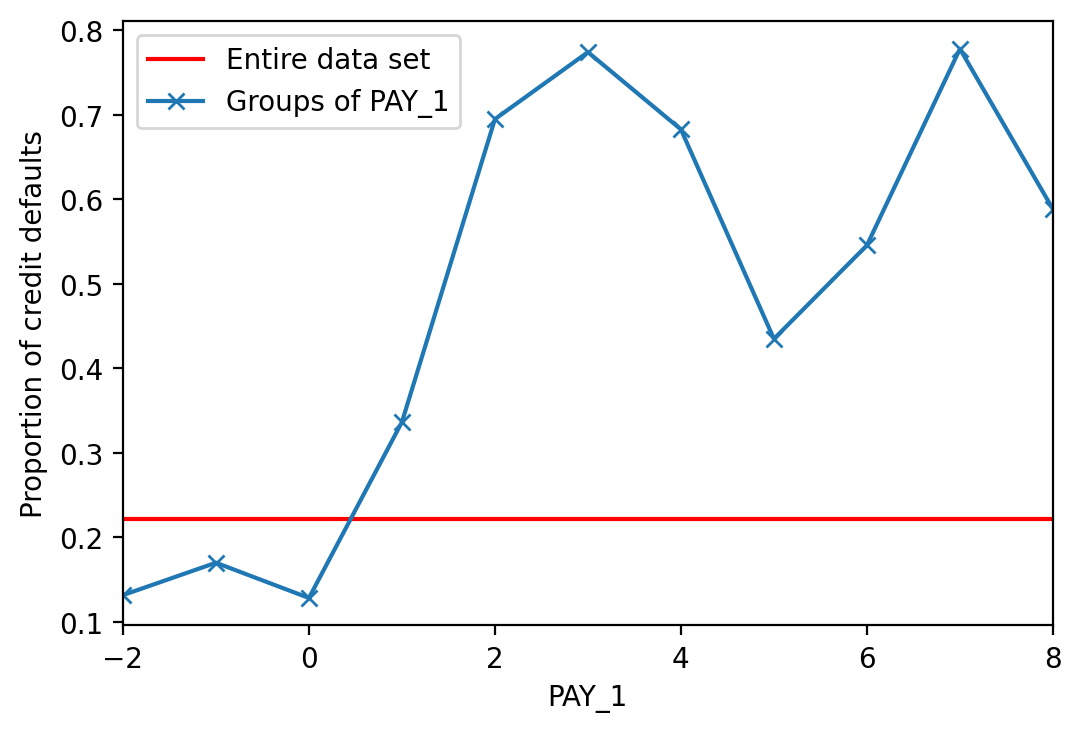

In [36]:
axes = plt.axes()
axes.axhline(overall_default_rate, color='red')
group_by_pay_mean_y.plot(marker='x', legend=False, ax=axes)
axes.set_ylabel('Proportion of credit defaults')
axes.legend(['Entire data set', 'Groups of PAY_1'])

In [37]:
pos_mask = y == 1
neg_mask = y == 0

Text(0.5, 1.0, 'Credit limits by response variable')

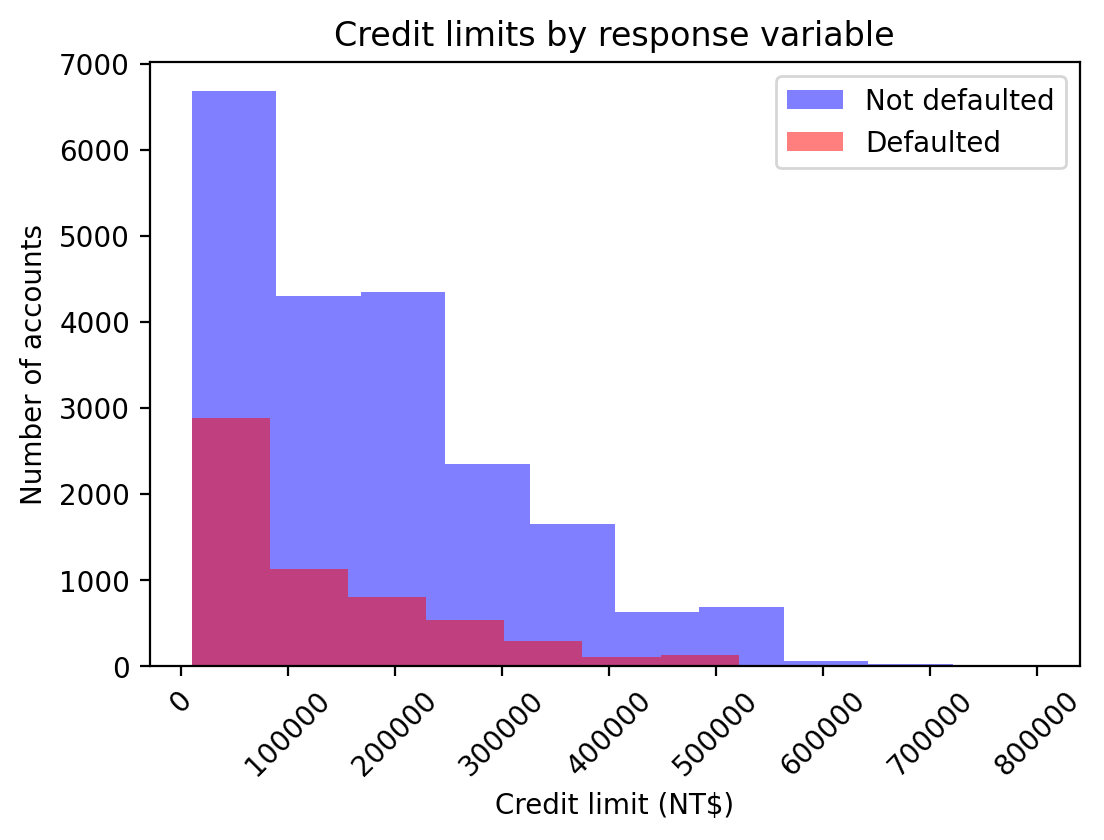

In [38]:
axes = plt.axes()
axes.hist(df.loc[neg_mask, 'LIMIT_BAL'], alpha=0.5, color='blue')
axes.hist(df.loc[pos_mask, 'LIMIT_BAL'], alpha=0.5, color='red')
axes.tick_params(axis='x', labelrotation=45)
axes.set_xlabel('Credit limit (NT$)')
axes.set_ylabel('Number of accounts')
axes.legend(['Not defaulted', 'Defaulted'])
axes.set_title('Credit limits by response variable')

In [39]:
df['LIMIT_BAL'].max()

800000

In [40]:
bin_edges = list(range(0,850000,50000))
print(bin_edges[-1])

800000


Text(0.5, 1.0, 'Normalized distributions of credit limits by response variable')

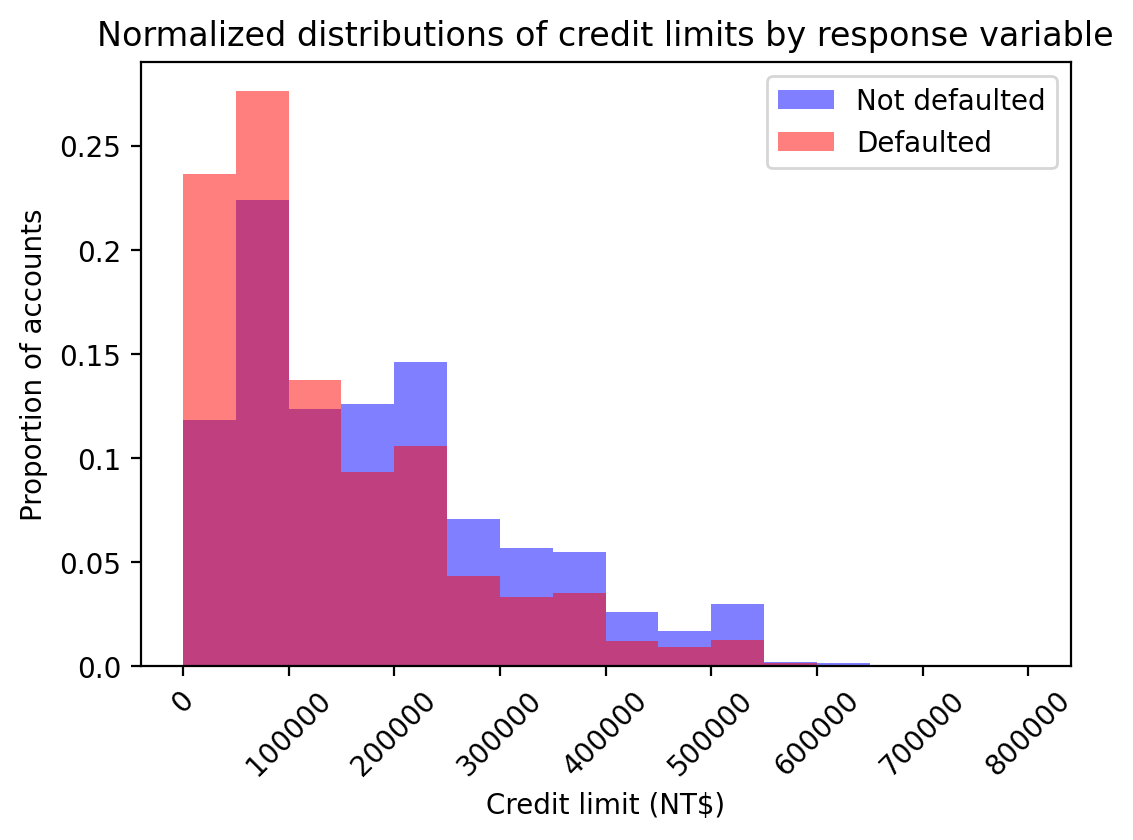

In [41]:
axes = plt.axes()
axes.hist(df.loc[neg_mask, 'LIMIT_BAL'], bins=bin_edges, alpha=0.5, density=True, color='blue')
axes.hist(df.loc[pos_mask, 'LIMIT_BAL'], bins=bin_edges, alpha=0.5, density=True, color='red')
axes.tick_params(axis='x', labelrotation=45)
axes.set_xlabel('Credit limit (NT$)')
axes.set_ylabel('Proportion of accounts')
y_ticks = axes.get_yticks()
axes.set_yticklabels(np.round(y_ticks*50000,2))
axes.legend(['Not defaulted', 'Defaulted'])
axes.set_title('Normalized distributions of credit limits by response variable')

In [42]:
np.mean([1, 2, 3, 4, 5])

3.0

In [43]:
def my_mean(input_argument):
    output = sum(input_argument)/len(input_argument)
    return(output)

In [44]:
my_mean([1, 2, 3, 4, 5])

3.0

In [45]:
my_mean(input_argument=[1, 2, 3])

2.0

In [46]:
np.exp(1)

2.718281828459045

In [47]:
np.exp(0)

1.0

In [48]:
X_exp = np.linspace(-4,4,81)
print(X_exp[:5])
print(X_exp[-5:])

[-4.  -3.9 -3.8 -3.7 -3.6]
[3.6 3.7 3.8 3.9 4. ]


In [49]:
Y_exp = np.exp(X_exp)
Y_exp[:5]

array([0.01831564, 0.02024191, 0.02237077, 0.02472353, 0.02732372])